In [10]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import requests
import geojson

Set longitude and latitude bounds for plot

In [11]:
minlon=48
maxlon=58.5
minlat=25
maxlat=34.2

Here we are going to ask for a list of earthquakes from the US Geological survey.  Have a look at this, but you don't need to edit anything. If your area is TOO big, you may get more than 20,000 earthquakes and the search may give you an error.  Note that it tells you how many earthquakes it did find.

In [12]:
parameters={
    "starttime":"1913-01-01",
    "endtime":"2013-12-31",
    "minmagnitude":4,
    "minlatitude":minlat,
    "maxlatitude":maxlat,
    "minlongitude":minlon,
    "maxlongitude":maxlon,
    "limit":20000,
    "format":"geojson"
}
response=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query",params=parameters)
output=response.json()
numquakes = len(output['features'])

print('Search returned: '+str(numquakes)+' earthquakes)' 

3342


Now we loop through the dataset we retrieved (which has a lot of info) and just pull out the latitude, longitude, depth, and magnitude of each earthquake.

In [13]:
lon=np.empty(numquakes,)
lat=np.empty(numquakes,)
z=np.empty(numquakes,)
mag=np.empty(numquakes,)
for i in range(numquakes):
    lon[i] = output['features'][i]['geometry']['coordinates'][0]
    lat[i] = output['features'][i]['geometry']['coordinates'][1]
    z[i]   = output['features'][i]['geometry']['coordinates'][2]   
    mag[i] = output['features'][i]['properties']['mag']
    

And now we make a map!  Look through this and find where the label colors, font "size" and weight are set.  Make them all blue, bold and size 14.  

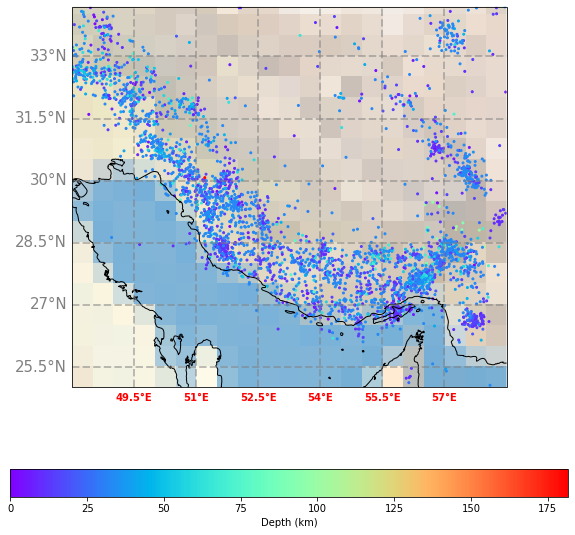

In [15]:
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([minlon,maxlon,minlat,maxlat])
ax.coastlines()
ax.stock_img()

im=ax.scatter(lon,lat,s=4,c=z,cmap='rainbow')

gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
fig.colorbar(im,ax=ax,label='Depth (km)',orientation='horizontal')
plt.show()
